In [1]:
#Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН,
#чья миссия состоит в повышении уровня благополучия детей по всему миру. 

#Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
#чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

#И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике
#для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели,
#проведите разведывательный анализ данных и составьте отчёт по его результатам. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project02\stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
#переименуем колонки
stud.rename(columns={'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob',
                     'studytime, granular': 'granular', 'Pstatus': 'pstatus'
                    }, inplace=True)
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

# school — аббревиатура школы

In [3]:
pd.DataFrame(stud.school.value_counts())

#потенциально важный признак. от школы как комплекса из ряда компонентов от уюта до т.н. "силы" преподавательского состава сильно
#зависит как приток новых перспективных учеников, так и развитие  потенциала "старых".

,school
GP,349
MS,46


In [4]:
stud.school.isnull().sum() #пустых позиций нет

0

# sex - распределение по полу

In [5]:
pd.DataFrame(stud.sex.value_counts()) 

#по статистике у мальчиков более развито абстрактное мышление,
#однако в случае если школа "математическая", то признак может нивелироваться.

,sex
F,208
M,187


In [6]:
stud.sex.isnull().sum() #пустых позиций нет

0

# age - распределение по возрасту

In [7]:
pd.DataFrame(stud.age.value_counts()) 

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


In [8]:
stud.age.isnull().sum() #пустых позиций нет

0

In [9]:
stud = stud.loc[stud.age < 18] #сразу отсеем "недетей"

In [10]:
#изначальное предположение: исходная таблица - результат оцифровки бумажных анкет.
#в первую очередь это основано на том, что первые и самые важные позиции (школа, пол  и возраст),
#обычно находящиеся в шапках подобных документов, не имеют пропусков.

# address - распределение по адресам
(U - город, R - пригород)

In [11]:
pd.DataFrame(stud.address.value_counts()) #распределение по адресам

,address
U,223
R,49


In [12]:
stud.address.isnull().sum() # 12 пустых позиций

12

# famsize - распределение по количеству членов семьи
(GT3 - больше трех, LE3 - меньше трех)

In [13]:
pd.DataFrame(stud.famsize.value_counts()) #распределение по количеству членов семьи

,famsize
GT3,191
LE3,74


In [14]:
stud.famsize.isnull().sum() # 19 пустых позиций

19

In [15]:
#этот признак предлагается отбросить как незначимый, т.к. и в маленькой семье могут быть и гиперопека
#и повышенная бытовая нагрузка, так и в большой семье может происходить как распыление внимание от шума
#и прочих сопутствующих факторов, но в то же время в некоторых больших семьях возникает явление самоорганизации
#и взаимопомощи.

# pstatus - статус совместного проживания родителей
('T' - живут вместе 'A' - раздельно)

In [16]:
pd.DataFrame(stud.pstatus.value_counts())

,pstatus
T,226
A,27


In [17]:
stud.pstatus.isnull().sum() # 31 пустая позиция

31

In [18]:
#предлагается отбросить: разного рода мотивация и внутрисемейный климат значительно важнее.

# medu - распределение по образованию матери
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [19]:
pd.DataFrame(stud.medu.value_counts()) 

,medu
4.0,100
2.0,75
3.0,69
1.0,36
0.0,2


In [20]:
stud.medu.isnull().sum() # 2 пустых позиции

2

# fedu - распределение по образованию матери
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [21]:
pd.DataFrame(stud.fedu.value_counts()) #распределение по образованию отца


,fedu
2.0,81
3.0,69
4.0,67
1.0,45
0.0,2
40.0,1


In [22]:
#единственный выброс 40.0 - скорее всего опечатка. поменяем на 4.0
stud.fedu = stud.fedu.apply(lambda x: 4.0 if x == 40.0 else x)
pd.DataFrame(stud.fedu.value_counts()) #проверяем

,fedu
2.0,81
3.0,69
4.0,68
1.0,45
0.0,2


In [23]:
stud.fedu.isnull().sum() #19 позиций с неизвестным уровнем образования

19

In [24]:
stud.medu = stud.medu.fillna(stud.medu.median()) #заменим пропуски на медианное значение.
stud.fedu = stud.fedu.fillna(stud.fedu.median())

# mjob, fjob - распределение по профессиям родителей

In [25]:
pd.DataFrame(stud.mjob.value_counts()) #распределение по профессии матери
#значимость профессий родителей неочевидна. требуется проверка.

,mjob
other,93
services,72
teacher,39
at_home,38
health,28


In [26]:
stud.mjob.isnull().sum() #14 позиций с неуказанной профессией

14

In [27]:
pd.DataFrame(stud.fjob.value_counts()) #распределение по профессии отца

,fjob
other,144
services,69
teacher,24
health,12
at_home,9


In [28]:
stud.fjob.isnull().sum() #26 позиций с неуказанной профессией

26

In [29]:
#переопределим неуказанные профессии как 'other'

stud.mjob = stud.mjob.apply(lambda x: 'other' if pd.isnull(x) else x)
stud.fjob = stud.fjob.apply(lambda x: 'other' if pd.isnull(x) else x)

# reason — причина выбора школы
'home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое

In [30]:
# очевидно, что "пассионарные" причины (репутация) должны оказывать большее влияние на итоги обучения,
# чем например "конформная" близость к дому. проверим ниже.

pd.DataFrame(stud.reason.value_counts())

,reason
course,100
reputation,77
home,70
other,21


In [31]:
stud.reason.isnull().sum() #16 неопределенных позиций.

16

In [32]:
stud.reason = stud.reason.apply(lambda x: 'home' if pd.isnull(x) else x) #обычно дети учатся там, где живут.
#это подтверждается в том числе и распределением по времени в пути до школы (ниже).
pd.DataFrame(stud.reason.value_counts())

,reason
course,100
home,86
reputation,77
other,21


# guardian — опекун
'mother' - мать, 'father' - отец, 'other' - другое

In [33]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,192
father,68
other,5


In [34]:
stud.guardian.isnull().sum() #19 пустых

19

In [35]:
stud.guardian = stud.guardian.apply(lambda x: 'other' if pd.isnull(x) else x) #попробуем заполнить.

# traveltime — время в пути до школы
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [36]:
pd.DataFrame(stud.traveltime.value_counts())

# долгие поездки в школу и обратно не только утомляют, но и отнимают время на занятия.
# предполагается отрицательная корреляция c итоговой оценкой. хотя тех, кто тратит на транспорт критично много времени, мало.

,traveltime
1.0,181
2.0,63
3.0,14
4.0,5


In [37]:
stud.traveltime.isnull().sum() #21 неопределенных позиций.


21

In [38]:
stud.traveltime = stud.traveltime.fillna(stud.traveltime.median()) #заполним неуказанные значения медианой
pd.DataFrame(stud.traveltime.value_counts())


,traveltime
1.0,202
2.0,63
3.0,14
4.0,5


In [39]:
stud.traveltime.describe()

count    284.000000
mean       1.373239
std        0.663103
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

# studytime — время на учёбу помимо школы в неделю
1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов

In [40]:
# очевидно, что чем больше времени уделяется занятиям, тем лучше результат экзаменов.
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,138
1.0,78
3.0,42
4.0,20


In [41]:
stud.studytime.isnull().sum() #6 неопределенных позиций.

6

In [42]:
stud.studytime = stud.studytime.fillna(stud.studytime.median()) #заполним неуказанные значения медианой
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,144
1.0,78
3.0,42
4.0,20


# failures — количество внеучебных неудач
(n, если 1<=n<=3, иначе 0)

In [43]:
# не совсем понятно, что подразумевается под этим термином, но по контексту возможно влияние на мотивацию и результат.
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,226
1.0,21
2.0,10
3.0,9


In [44]:
stud.failures.isnull().sum() #18 неопределенных позиций. 

18

In [45]:
stud.failures = stud.failures.fillna(stud.failures.median()) #присвоим медианное значение
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,244
1.0,21
2.0,10
3.0,9


# schoolsup — дополнительная образовательная поддержка
(yes или no)

In [46]:
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,231
yes,46


In [47]:
stud.schoolsup.isnull().sum() #7 неопределенных позиций. 

7

In [48]:
stud.schoolsup = stud.schoolsup.apply(lambda x: 'yes' if pd.isnull(x) else x) #тянут "отстающих", а они этого стесняются
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,231
yes,53


In [49]:
#stud.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
#pd.DataFrame(stud.schoolsup.value_counts())
#stud.schoolsup.describe()

# famsup — семейная образовательная поддержка
(yes или no)

In [50]:
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,167
no,89


In [51]:
stud.famsup.isnull().sum() #28 неопределенных позиций. 

28

In [52]:
stud.famsup = stud.famsup.apply(lambda x: 'yes' if pd.isnull(x) else x) #то же, что и со школьной поддержкой
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,195
no,89


# paid — дополнительные платные занятия по математике
(yes или no)

In [53]:
pd.DataFrame(stud.paid.value_counts())

,paid
no,141
yes,111


In [54]:
stud.paid.isnull().sum() #32 неопределенных позиций. 

32

In [55]:
stud.paid = stud.paid.apply(lambda x: 'no' if pd.isnull(x) else x) #не о чем написать = пропуск графы.
pd.DataFrame(stud.paid.value_counts())

,paid
no,173
yes,111


# activities — дополнительные внеучебные занятия
(yes или no)

In [56]:
# признак предположительно малозначим. т.к. может говорить, как о эрудиции, так и о распылении усилий. 
pd.DataFrame(stud.activities.value_counts())

,activities
yes,146
no,125


In [57]:
stud.activities.isnull().sum() #13 неопределенных позиций. 

13

In [58]:
stud.activities = stud.activities.apply(lambda x: 'no' if pd.isnull(x) else x) #не о чем написать = пропуск графы
pd.DataFrame(stud.activities.value_counts())

,activities
yes,146
no,138


# nursery — посещался ли детский сад
(yes или no)

In [59]:
#предлагается отбросить за неочевидностью влияния на успехи в математике
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,223
no,54


In [60]:
stud.nursery.isnull().sum() #7 неопределенных позиций. 

7

# higher — планы на получение высшего образования
(yes или no)

In [61]:
# очевидно, будет наблюдаться сильная корелляция 
pd.DataFrame(stud.higher.value_counts())

,higher
yes,261
no,7


In [62]:
stud.higher.isnull().sum() #16 неопределенных позиций. 

16

In [63]:
stud.higher = stud.higher.apply(lambda x: 'yes' if pd.isnull(x) else x) #учение - свет.
pd.DataFrame(stud.higher.value_counts())

,higher
yes,277
no,7


# internet — наличие интернета дома
(yes или no)

In [64]:
#возможна положительная корреляция
pd.DataFrame(stud.internet.value_counts())

,internet
yes,221
no,39


In [65]:
stud.internet.isnull().sum() #24 неопределенных позиций. 

24

In [66]:
stud.internet = stud.internet.apply(lambda x: 'yes' if pd.isnull(x) else x) #сейчас и-нет скорее есть, чем нет
pd.DataFrame(stud.internet.value_counts())

,internet
yes,245
no,39


# romantic — наличие романтических отношений
(yes или no)

In [67]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,181
yes,79


In [68]:
stud.romantic.isnull().sum() #24 неопределенных позиций. 

24

In [69]:
stud.romantic = stud.romantic.apply(lambda x: 'yes' if pd.isnull(x) else x)
#если что-то есть, то к этому возрасту уже обычно не стесняются, особенно, если анкета анонимная
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,181
yes,103


# famrel — семейные отношения
(от 1 - очень плохо до 5 - очень хорошо)

In [70]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,128
5.0,69
3.0,49
2.0,14
1.0,5
-1.0,1


In [71]:
stud.famrel.isnull().sum() #18 неопределенных позиций. 

18

In [72]:
#одно аномальное значение "-1.0" - скорее всего опечатка: поменяем на 1
stud.famrel = stud.famrel.apply(lambda x: 1.0 if x == -1.0 else x)
stud.famrel = stud.famrel.fillna(stud.famrel.median()) #заполняем медианным значением
pd.DataFrame(stud.famrel.value_counts()) #проверяем

,famrel
4.0,146
5.0,69
3.0,49
2.0,14
1.0,6


# freetime — свободное время после школы
(от 1 - очень мало до 5 - очень много)

In [73]:
# связь может быть как положительной, так и отрицательной, в зависимости от того, чем это свободное время заполнять.
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,112
4.0,80
2.0,45
5.0,28
1.0,13


In [74]:
stud.freetime.isnull().sum() #6 неопределенных позиций. 

6

In [75]:
stud.freetime = stud.freetime.fillna(stud.freetime.median()) #заполняем медианным значением
pd.DataFrame(stud.freetime.value_counts()) #проверяем

,freetime
3.0,118
4.0,80
2.0,45
5.0,28
1.0,13


# goout — проведение времени с друзьями
(от 1 - очень мало до 5 - очень много)

In [76]:
# скорее всего для результативной учебы этот признак вреден
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,89
2.0,79
4.0,53
5.0,38
1.0,18


In [77]:
stud.goout.isnull().sum() #7 неопределенных позиций. 

7

In [78]:
stud.goout = stud.goout.fillna(stud.goout.median()) #заполняем медианным значением
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,96
2.0,79
4.0,53
5.0,38
1.0,18


# health — текущее состояние здоровья
(от 1 - очень плохо до 5 - очень хорошо)

In [79]:
#скорее всего это малозначимый признак
pd.DataFrame(stud.health.value_counts())

,health
5.0,108
3.0,59
4.0,41
1.0,35
2.0,29


In [80]:
stud.health.isnull().sum() #12 неопределенных позиций. 

12

In [81]:
stud.health = stud.health.fillna(stud.health.median()) #заполняем медианным значением
pd.DataFrame(stud.health.value_counts()) #проверяем

,health
5.0,108
3.0,59
4.0,53
1.0,35
2.0,29


# absences — количество пропущенных занятий

In [82]:
pd.DataFrame(stud.absences.value_counts())

,absences
0.0,79
2.0,52
4.0,41
6.0,28
8.0,14
10.0,12
12.0,9
14.0,8
16.0,5
18.0,4


In [83]:
stud.absences.isnull().sum() #8 неопределенных позиций.

8

In [84]:
stud.absences = stud.absences.fillna(0) #заполняем нулевым значением

In [85]:
stud = stud.loc[stud.absences < 50] #отсеем аномально большие значения
pd.DataFrame(stud.absences.value_counts()) #проверяем

,absences
0.0,87
2.0,52
4.0,41
6.0,28
8.0,14
10.0,12
12.0,9
14.0,8
16.0,5
18.0,4


# granular
позиция без описания

In [86]:
#позиция без описания
pd.DataFrame(stud.granular.value_counts())
#предлагается отбросить.

,granular
-6.0,135
-3.0,78
-9.0,42
-12.0,20


# score — баллы по госэкзамену по математике

In [87]:
pd.DataFrame(stud.score.value_counts())

,score
50.0,41
55.0,34
75.0,29
60.0,25
65.0,22
0.0,21
70.0,20
45.0,17
40.0,16
80.0,13


In [88]:
stud.score.isnull().sum() #1 неопределенная позиция. а с "недетьми" было шесть!

1

<AxesSubplot:>

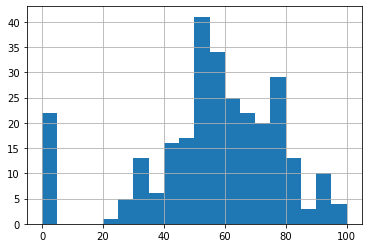

In [89]:
stud.score = stud.score.apply(lambda x: 0.0 if pd.isnull(x) else x) #присвоим '0.0': неявка = несдача автоматом
#pd.DataFrame(stud.score.value_counts())
stud.score.hist(bins = 20)

In [90]:
#stud = stud.loc[stud['score'] != 0]
#stud.score.hist(bins = 20)
# отбрасывание нулевого результата как неявки, выбросило из статистически значимых признак наличия
# романтических отношений!

In [91]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.158499,-0.099481,0.083020,-0.064705,-0.010897,0.065187,-0.028563,-0.015704,0.156504,-0.013097,0.178954,-0.086623
medu,-0.158499,1.000000,0.576573,-0.155997,0.089019,-0.184843,-0.089662,-0.024685,0.043570,0.070784,-0.017910,0.071554,0.225969
fedu,-0.099481,0.576573,1.000000,-0.138288,0.006286,-0.207693,-0.006361,0.035865,0.014583,0.040376,0.063769,0.016053,0.088578
traveltime,0.083020,-0.155997,-0.138288,1.000000,-0.079438,0.147052,0.080557,-0.015528,0.002606,0.129225,-0.081407,0.012302,-0.077900
studytime,-0.064705,0.089019,0.006286,-0.079438,1.000000,-0.126032,-1.000000,-0.036383,-0.162042,-0.049926,-0.043757,-0.081976,0.078019
failures,-0.010897,-0.184843,-0.207693,0.147052,-0.126032,1.000000,0.126512,-0.047753,0.055379,0.072057,0.068399,0.084191,-0.362639
granular,0.065187,-0.089662,-0.006361,0.080557,-1.000000,0.126512,1.000000,0.036715,0.165592,0.050557,0.044176,0.082363,-0.079058
famrel,-0.028563,-0.024685,0.035865,-0.015528,-0.036383,-0.047753,0.036715,1.000000,0.129232,0.048215,0.138973,-0.117025,0.036883
freetime,-0.015704,0.043570,0.014583,0.002606,-0.162042,0.055379,0.165592,0.129232,1.000000,0.307279,0.035453,0.053477,0.040615
goout,0.156504,0.070784,0.040376,0.129225,-0.049926,0.072057,0.050557,0.048215,0.307279,1.000000,-0.024456,0.165115,-0.104717


In [92]:
#неожиданно низкие коэффициенты корреляции. из общего ряда заметно выбивается уровень образования матери и внеучебные неудачи.
#если со вторым все понятно, то повышенная корреляция первого критерия вероятно связана с тем, что в качестве "опекуна"
# у подавляющего большинства учеников указана именно мать, а уровень образования матерей в этом опросе еще и несколько выше,
# чем у отцов. вероятнее всего под опекуном тут понимается не юридическое значение (т.к. большая часть семей - полная),
# а член семьи с которым у опрошенного ученика наиболее близкий контакт. 

In [93]:
#для проверки этого предположения введем еще две вспомогательные колонки 

stud = stud.assign(pedu = (stud.medu + stud.fedu)/2) #средний уровень образования родителей
stud = stud.assign(gedu = 0) # уровень образования "опекуна"
#заполним на основании значения в колонке guardian

stud['gedu'] = stud[['guardian', 'medu', 'fedu', 'pedu']].apply(
    lambda x: x[1] if x[0] == 'mother' else x[2] if x[0] == 'father' else x[3], axis=1)

pd.DataFrame(stud.pedu.value_counts())



,pedu
2.0,54
3.5,54
3.0,49
4.0,46
2.5,29
1.5,27
1.0,21
0.5,1


In [94]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score,pedu,gedu
age,1.000000,-0.158499,-0.099481,0.083020,-0.064705,-0.010897,0.065187,-0.028563,-0.015704,0.156504,-0.013097,0.178954,-0.086623,-0.145847,-0.119306
medu,-0.158499,1.000000,0.576573,-0.155997,0.089019,-0.184843,-0.089662,-0.024685,0.043570,0.070784,-0.017910,0.071554,0.225969,0.891913,0.874539
fedu,-0.099481,0.576573,1.000000,-0.138288,0.006286,-0.207693,-0.006361,0.035865,0.014583,0.040376,0.063769,0.016053,0.088578,0.883727,0.716955
traveltime,0.083020,-0.155997,-0.138288,1.000000,-0.079438,0.147052,0.080557,-0.015528,0.002606,0.129225,-0.081407,0.012302,-0.077900,-0.165893,-0.113317
studytime,-0.064705,0.089019,0.006286,-0.079438,1.000000,-0.126032,-1.000000,-0.036383,-0.162042,-0.049926,-0.043757,-0.081976,0.078019,0.054469,0.042653
failures,-0.010897,-0.184843,-0.207693,0.147052,-0.126032,1.000000,0.126512,-0.047753,0.055379,0.072057,0.068399,0.084191,-0.362639,-0.220829,-0.203549
granular,0.065187,-0.089662,-0.006361,0.080557,-1.000000,0.126512,1.000000,0.036715,0.165592,0.050557,0.044176,0.082363,-0.079058,-0.054895,-0.043001
famrel,-0.028563,-0.024685,0.035865,-0.015528,-0.036383,-0.047753,0.036715,1.000000,0.129232,0.048215,0.138973,-0.117025,0.036883,0.005711,-0.005819
freetime,-0.015704,0.043570,0.014583,0.002606,-0.162042,0.055379,0.165592,0.129232,1.000000,0.307279,0.035453,0.053477,0.040615,0.033028,0.029796
goout,0.156504,0.070784,0.040376,0.129225,-0.049926,0.072057,0.050557,0.048215,0.307279,1.000000,-0.024456,0.165115,-0.104717,0.062892,0.040376


In [95]:
#предположение не оправдалось: коэффициент корреляции уровня образования опекуна, ниже чем у образования матери.

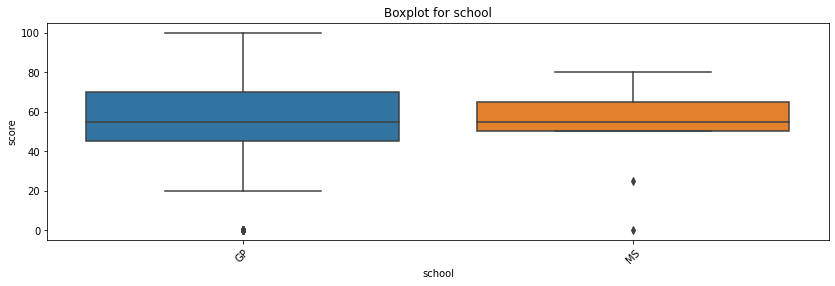

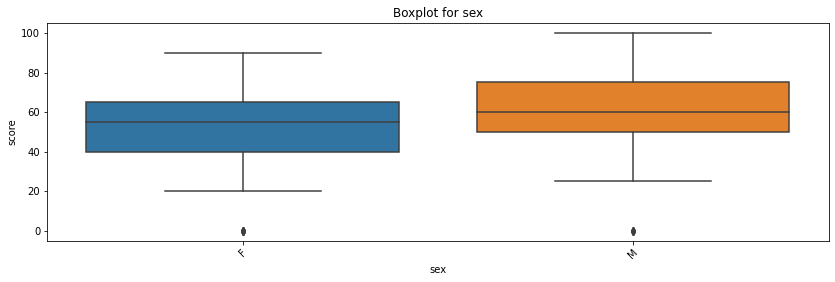

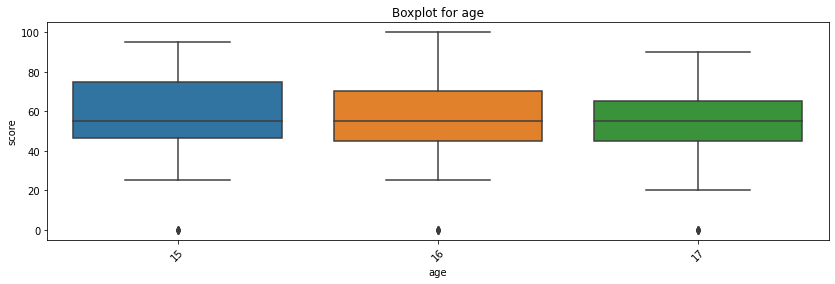

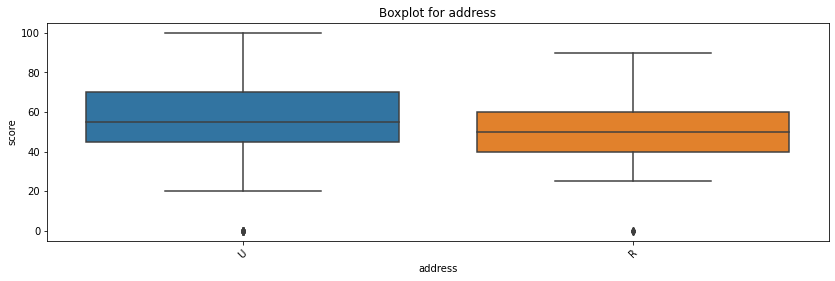

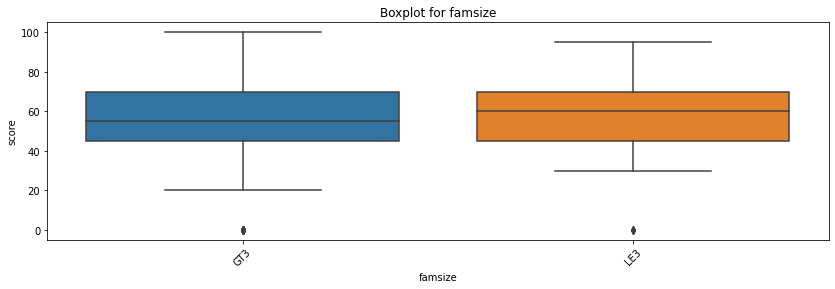

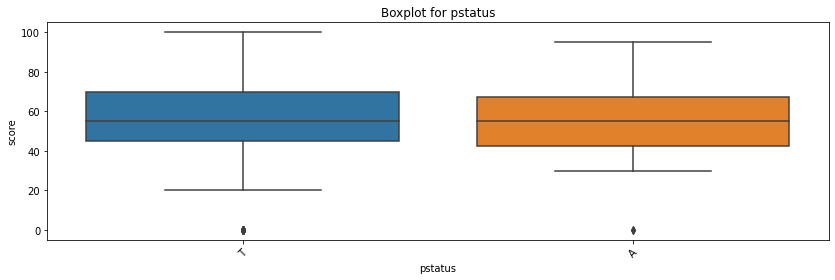

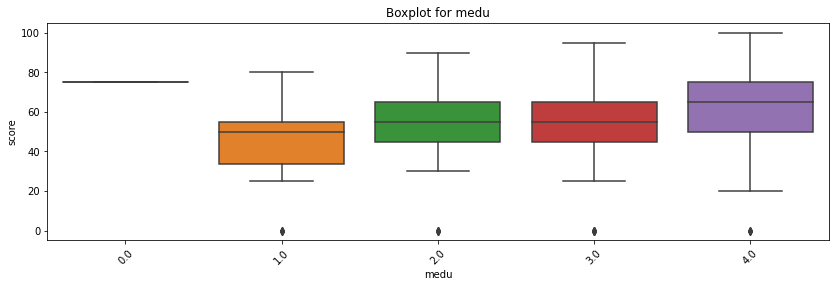

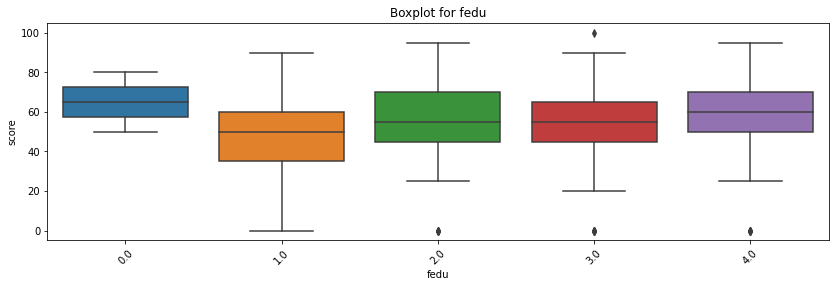

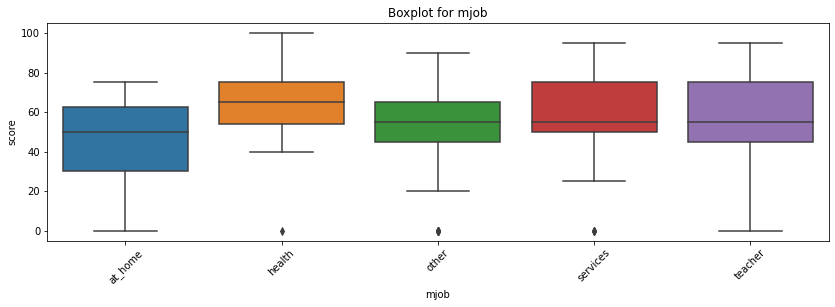

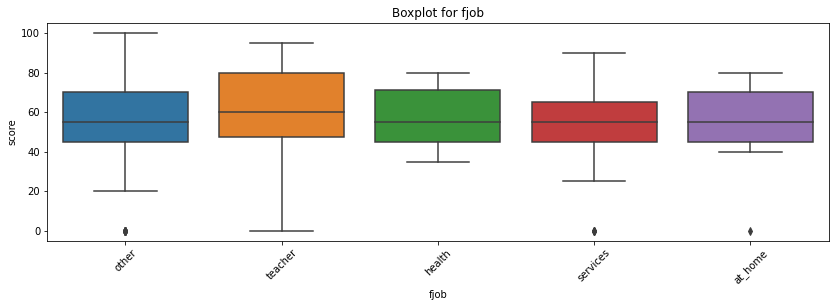

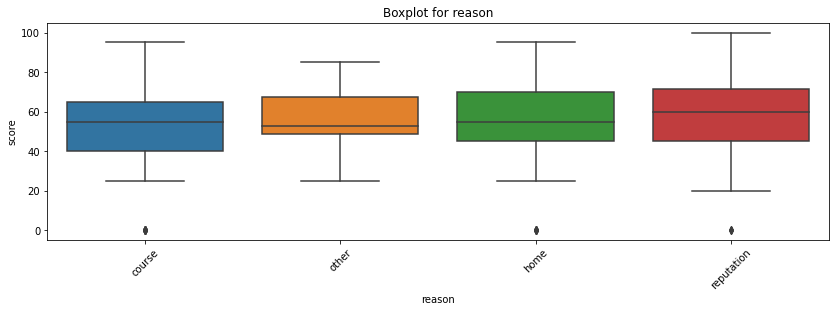

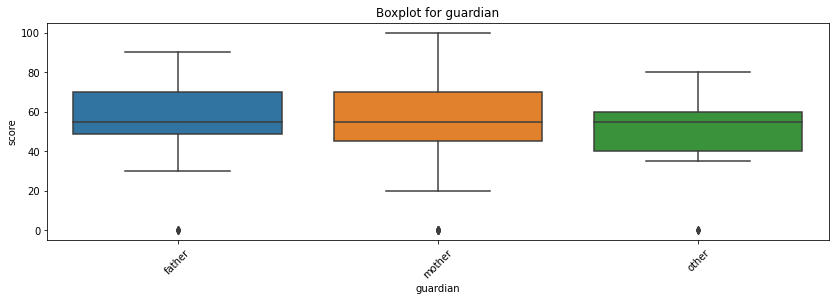

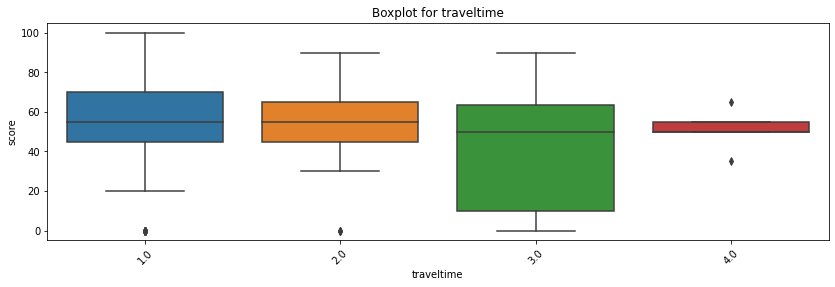

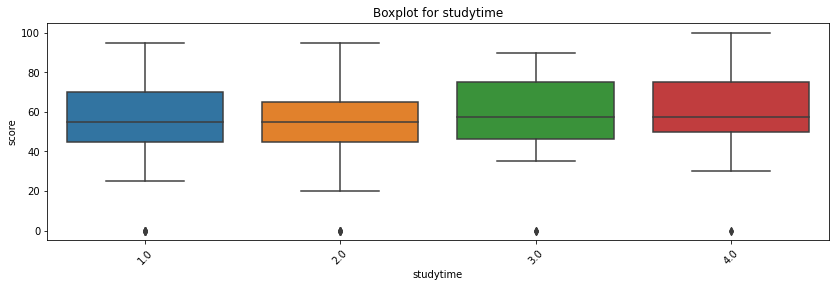

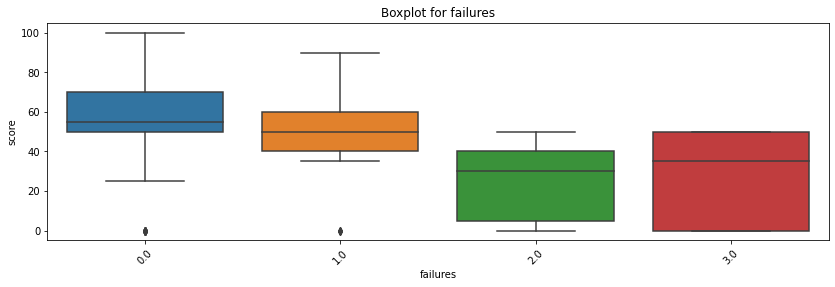

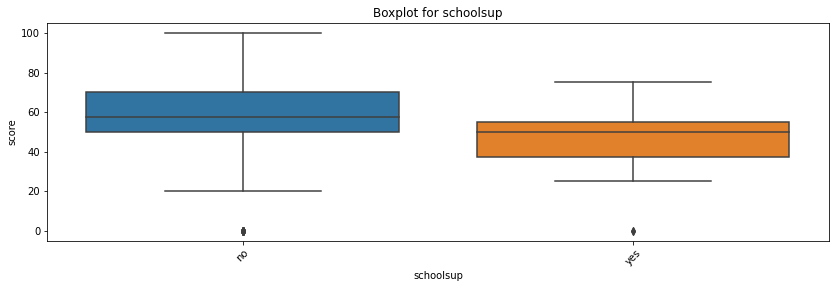

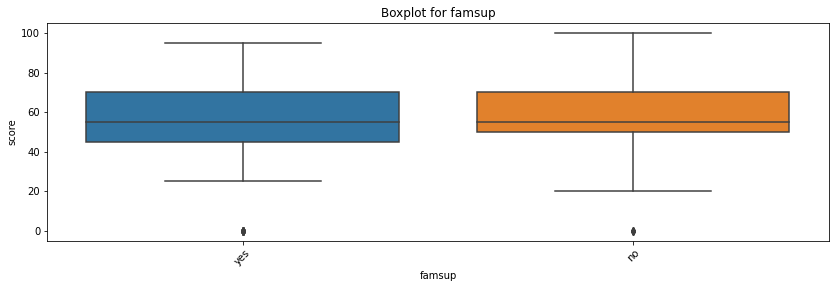

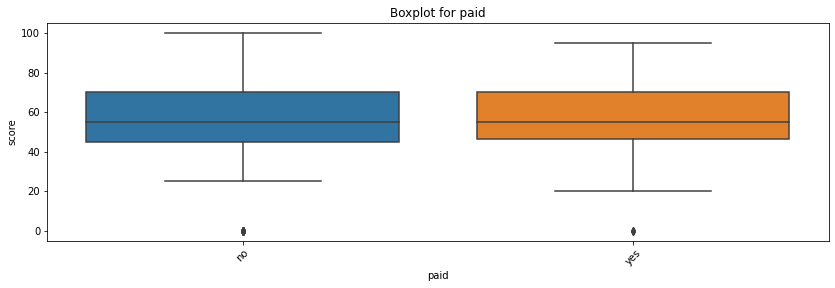

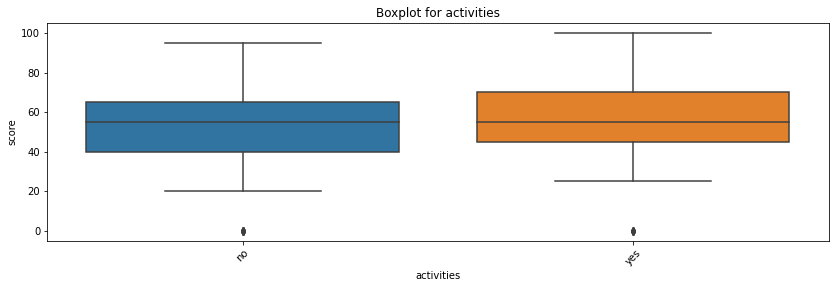

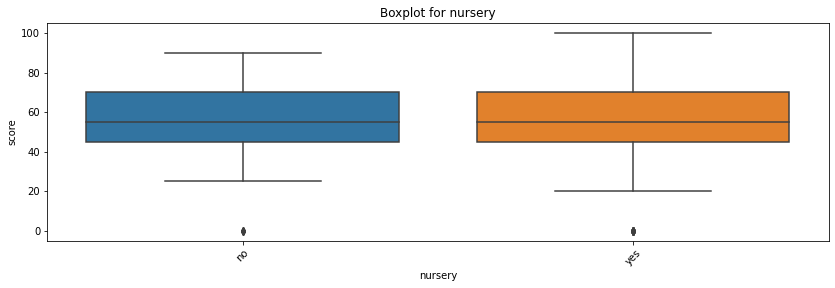

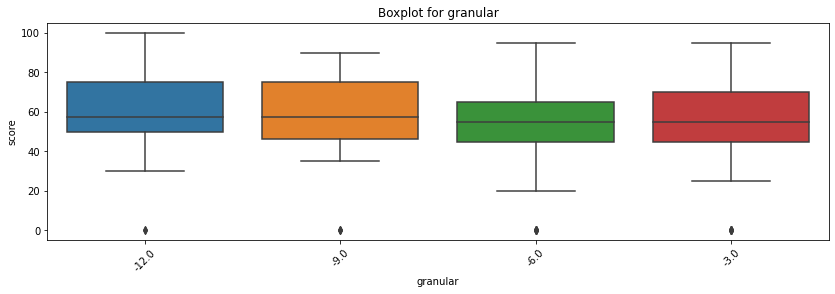

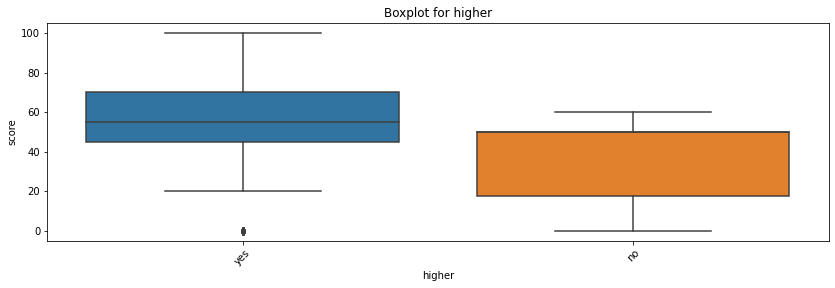

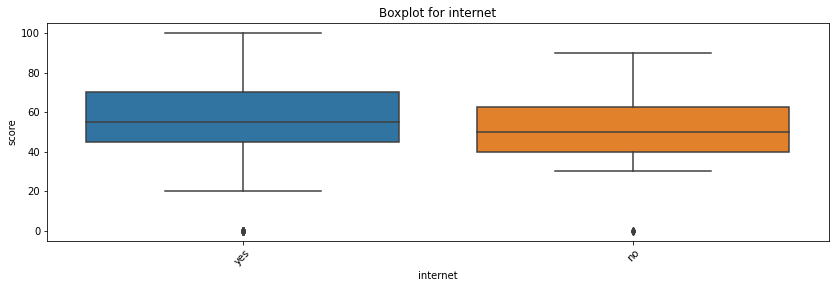

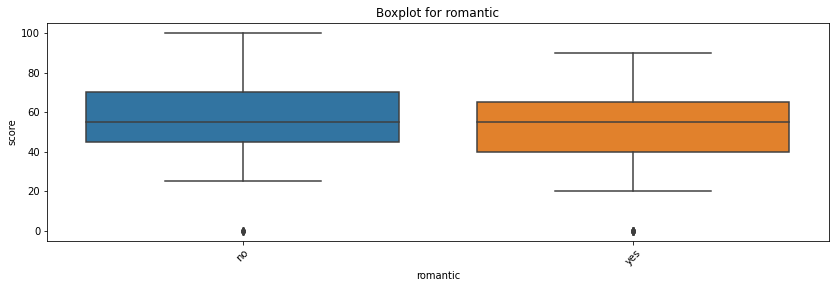

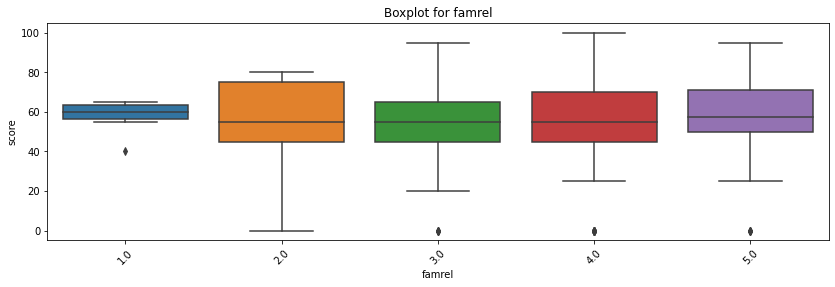

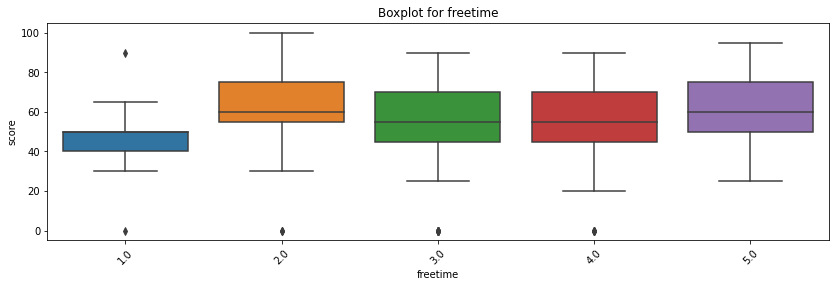

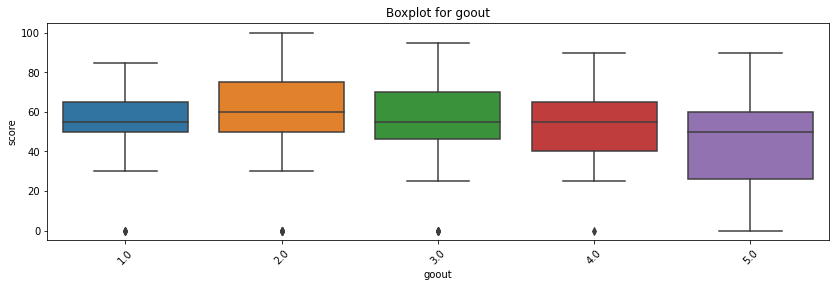

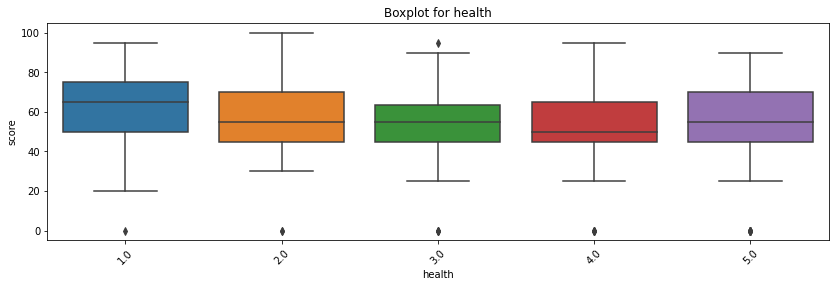

In [96]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:20])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

       
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
            'goout', 'health'  
           ]:
    get_boxplot(col)

In [97]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
            'goout', 'health', 'absences'
           ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [98]:
stud.drop(['famsize'], inplace = True, axis = 1) #как и предполагалось
stud.drop(['pstatus'], inplace = True, axis = 1) #как и предполагалось 
stud.drop(['guardian'], inplace = True, axis = 1) #непонятный признак с невыявленной значимостью.
stud.drop(['nursery'], inplace = True, axis = 1) #как и предполагалось
stud.drop(['granular'], inplace = True, axis = 1) #непонятный признак с абсолютной корреляцией studytime 
stud.drop(['medu'], inplace = True, axis = 1) #решено отбросить для учета вероятности аномальности данной выборки
stud.drop(['fedu'], inplace = True, axis = 1) # заметного влияние не оказывает, но возможна аномальность
stud.drop(['pedu'], inplace = True, axis = 1) # вспомогательный признак, который не помог
stud.drop(['gedu'], inplace = True, axis = 1) # вспомогательный признак, который не помог
stud.drop(['goout'], inplace = True, axis = 1) # вопреки подозрениям влияния не оказал
stud.drop(['age'], inplace = True, axis = 1) # влияния не оказывает
stud.drop(['famrel'], inplace = True, axis = 1) # влияния не оказывает
stud.drop(['mjob'], inplace = True, axis = 1) # решено отбросить для учета вероятности аномальности данной выборки
stud.drop(['fjob'], inplace = True, axis = 1) # заметного влияние не оказывает, но возможна аномальность
stud.drop(['reason'], inplace = True, axis = 1) # различия между разными причинами есть, но небольшие.
stud.drop(['traveltime'], inplace = True, axis = 1) #большинство живет рядом со школой, поэтому влияния не оказывает. 
stud.drop(['studytime'], inplace = True, axis = 1) #различия оценки от времени на самостоятельные занятия есть, но небольшие
stud.drop(['freetime'], inplace = True, axis = 1) # неоднозначный признак с небольшими различиями в зависимости от значения
stud.drop(['famsup'], inplace = True, axis = 1) # в отличие от школьных допзанятий малозначим
stud.drop(['paid'], inplace = True, axis = 1) # странно, но влияния не обнаружено 
stud.drop(['activities'], inplace = True, axis = 1)  # неоднозначный признак с небольшими различиями от значения к значению
stud.drop(['health'], inplace = True, axis = 1)  # значимость не выявлена
stud.drop(['absences'], inplace = True, axis = 1) # значимость не выявлена
stud.drop(['internet'], inplace = True, axis = 1) # различия между вариантами есть, но небольшие.
stud.drop(['school'], inplace = True, axis = 1) #видимо обе школы в данной выборке очень похожи 

display(stud.head(10))

,sex,address,failures,schoolsup,higher,romantic,score
1,F,U,0.0,no,yes,no,30.0
2,F,U,3.0,yes,yes,yes,50.0
3,F,U,0.0,no,yes,yes,75.0
4,F,U,0.0,no,yes,no,50.0
5,M,U,0.0,no,yes,no,75.0
6,M,NaN,0.0,no,yes,no,55.0
7,F,U,0.0,yes,yes,no,30.0
8,M,U,0.0,no,yes,no,95.0
9,M,U,0.0,no,yes,no,75.0
10,F,U,0.0,no,yes,no,45.0


# предварительные выводы
основными факторами, влияющими на успешность сдачи экзамена по математике являются: 
- пол (мальчики успешней)
- место проживания (удивительно, но согласно этой выборке городские дети успешней в математике)
- внеучебные неудачи (больше неудач - хуже мотивация - ниже результат экзамена)
- дополнительные занятия в школе (видимо тут имеются в виду не факультатив для продвинутого изучения,
    а именно занятия для сильно отстающих, и уровень их результативности всё равно ниже, чем у тех, кому
    такие занятия не требуются)
- планы на поступление в вуз (те, кто хочет получить высшее образование, сильнее замотивированы)
- романтические отношения (сильно отвлекают о учебы с закономерным результатом)

также можно вернуть в модель уровни образования и профессии родителей, так как они всё же выделяются на общем фоне
более высокой корелляцией с итоговым баллом.